In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pubg_train = pd.read_csv('/Users/lumi/Documents/UCLA/Grad/18 FALL/273/Pubg/pudg/all/train_group.csv')

In [4]:
pubg_train = pubg_train.drop(['groupId', 'matchId'], axis = 1)
pubg_train['teamsize'] = pubg_train.teamsize.astype('object')
pubg_train = pd.get_dummies(pubg_train)

In [5]:
dfX = pubg_train.drop(['winPlacePerc', 'winPoints', 'killPoints',
                       'kills', 'assists', 'boosts', 'heals','weaponsAcquired', 'KADistance', 'vehicleDestroys',
                      'itemDistance', 'roadKills', 'revives', 'longestKill', 'headshotKills', 'damageDealt',
                      'teamKills', 'swimDistance', 'KADuration', 'DBNOs'], axis=1)
features = dfX.columns.tolist()
Xtrain = dfX.as_matrix()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [10]:
ytr = pubg_train['winPlacePerc'].as_matrix()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [6]:
nsamp = Xtrain.shape[0]
nf = len(features)
print('number of sample', nsamp)
print('number of feature', nf)

number of sample 592454
number of feature 10


In [7]:
from sklearn import preprocessing

Xtr = Xtrain.astype(float)
Xs = preprocessing.scale(Xtr)
#ys = preprocessing.scale(ytr)

In [8]:
#regularization with CV
from sklearn import linear_model
from sklearn import model_selection

In [11]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(Xs, ytr, test_size = 0.2, train_size = 0.8)

In [13]:
# Fit linear model 
reg = linear_model.LinearRegression()
reg.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#limit target variable in 0 and 1
def confine_predictions(x):
    for i in range(len(x)):
        if x[i] > 1:
            x[i] = 1
        elif x[i] < 0:
            x[i] = 0

In [15]:
# Measure normalized mse for the test set and print
yhat = reg.predict(X_ts)
confine_predictions(yhat)
mae_ts = np.mean(abs(y_ts-yhat))
print('MAE on the test data =', mae_ts)

MAE on the test data = 0.07109255468256534


In [22]:
coef = reg.coef_
rowname = list(dfX)
table = pd.DataFrame(coef, index = rowname)
print(table)

                          0
killPlace     -2.040321e-01
killStreaks   -9.387383e-02
maxPlace       1.636558e-02
numGroups      1.574914e-02
rideDistance   2.499063e-02
walkDistance   1.248435e-01
matchDuration -2.956409e-02
itemDuration   4.329571e-02
teamsize_1    -6.095085e+09
teamsize_2    -6.095085e+09


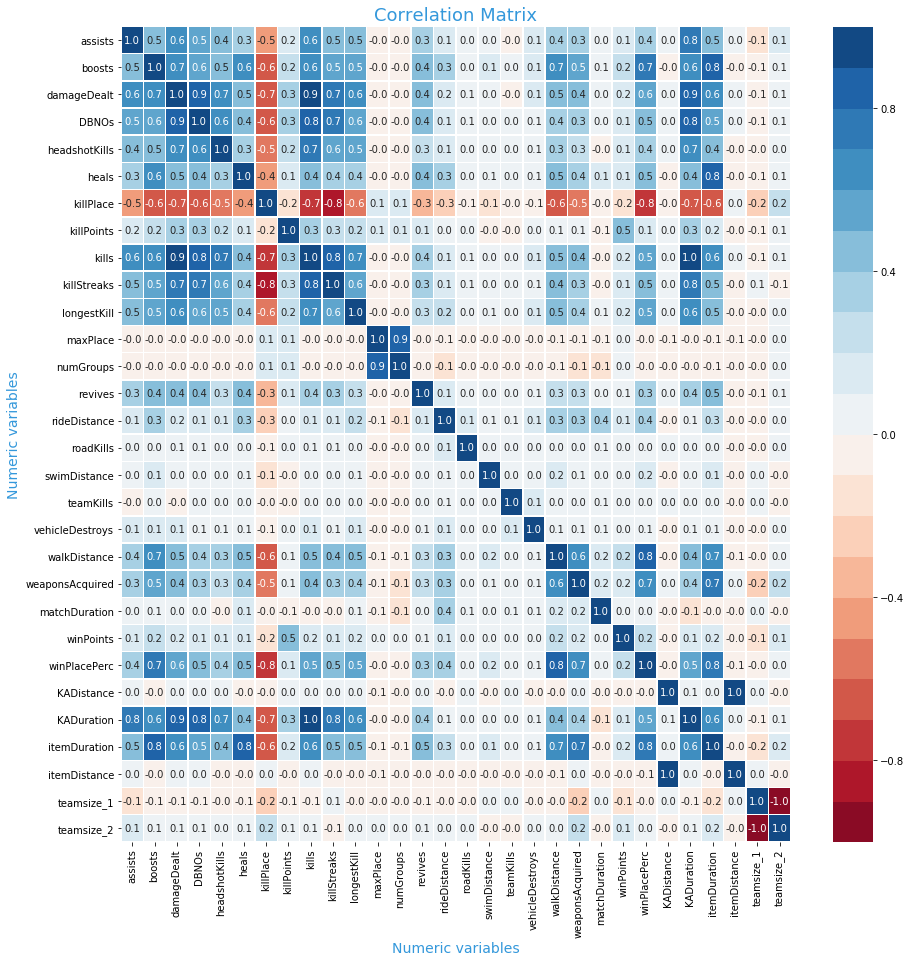

In [28]:
import seaborn as sns
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pubg_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("RdBu", 20))

ax.set_xlabel('Numeric variables', size=14, color="#3498DB")
ax.set_ylabel('Numeric variables', size=14, color="#3498DB")
ax.set_title('Correlation Matrix', size=18, color="#3498DB")

plt.show()